# 1. Predicting Activities Using the Decision Tree Model Trained on the UCI-HAR Dataset

## **Objective:**
To utilize the Decision Tree model trained on the UCI-HAR dataset to predict the activities performed and to evaluate the model's performance.

## **Dataset Options:**
1. **Raw accelerometer data**
2. **TSFEL featurized data**
3. **Features provided by the authors**

## **Choice of Dataset:**
I selected the **raw accelerometer data** and **TSFEL featurized data** for this analysis.

## **Steps:**
1. **Load and preprocess** my raw accelerometer data to extract relevant features.
2. **Use the trained model** to predict activities based on the preprocessed data.
3. **Evaluate model performance** using accuracy, precision, recall, and confusion matrix.

In [1]:
import pandas as pd
import numpy as np
import os

# Give the path of the test and train folder of UCI HAR Dataset
train_path = "./UCI HAR Dataset/train"
test_path = "./UCI HAR Dataset/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}


# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_whitespace=True,header=None)


# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path,"subject_train.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(train_path,"y_train.txt"),delim_whitespace=True,header=None)


# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
        save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        data.to_csv(save_path,index=False)

print("Done Combining the training data")


# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whitespace=True,header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path,"subject_test.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path,"y_test.txt"),delim_whitespace=True,header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):
    
        sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
        labels = y.loc[sub_idxs]

        # Toggle through all the labels.
        for label in np.unique(labels.values):
    
            if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
                os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))
    
            label_idxs = labels[labels.iloc[:,0] == label].index
    
            accx = []
            accy = []
            accz = []
            for idx in label_idxs:
                if accx is not None:
                    accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                    accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                    accz = np.hstack((accz,total_acc_z.loc[idx][64:]))
    
                else:
                    accx = total_acc_x.loc[idx]
                    accy = total_acc_y.loc[idx]
                    accz = total_acc_z.loc[idx]
    
            # saving the data into csv file
            data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
            save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
            data.to_csv(save_path,index=False)

# print("Done Combining the testing data")
# print("Done Combining the data")

/var/folders/ws/fygh4lvs7f1f0qdwysntrxch0000gn/T/ipykernel_69124/2421164896.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
/var/folders/ws/fygh4lvs7f1f0qdwysntrxch0000gn/T/ipykernel_69124/2421164896.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
/var/folders/ws/fygh4lvs7f1f0qdwysntrxch0000gn/T/ipykernel_69124/2421164896.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial S

Done Combining the training data


/var/folders/ws/fygh4lvs7f1f0qdwysntrxch0000gn/T/ipykernel_69124/2421164896.py:72: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
/var/folders/ws/fygh4lvs7f1f0qdwysntrxch0000gn/T/ipykernel_69124/2421164896.py:73: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
/var/folders/ws/fygh4lvs7f1f0qdwysntrxch0000gn/T/ipykernel_69124/2421164896.py:74: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signal

In [25]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)
y_test0 = np.array(y_test)

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


Accuracy: 0.6666666666666666
Precision: 0.6593253968253968
Recall: 0.6666666666666666
Confusion Matrix:
[[7 2 0 0 0 0]
 [2 3 2 1 1 0]
 [1 3 5 0 0 0]
 [0 0 0 6 0 3]
 [0 0 0 0 9 0]
 [0 0 0 3 0 6]]


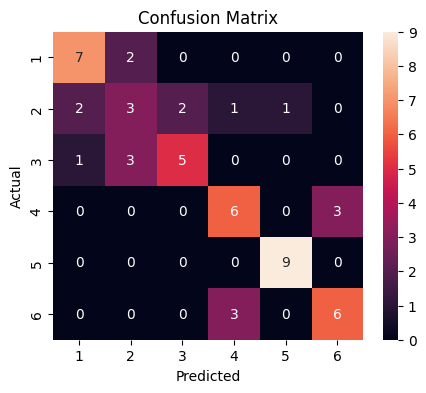

In [26]:
# Calculate the magnitude of the acceleration for each sample and time step
acc_magnitude = X_train[:,:,0]**2 + X_train[:,:,1]**2 + X_train[:,:,2]**2 
acc_magnitude_test = X_test[:,:,0]**2 + X_test[:,:,1]**2 + X_test[:,:,2]**2

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',random_state=44)
dt.fit(acc_magnitude, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
y_pred = dt.predict(acc_magnitude_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred, average = 'weighted') 
print(f'Precision: {precision}')

# Calculate recall (for binary classification, set the average parameter accordingly)
recall = recall_score(y_test, y_pred, average = 'weighted')  
print(f'Recall: {recall}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Shape of training data: (126, 7)
Shape of testing data: (54, 7)
Accuracy: 0.7222222222222222
Precision: 0.7321428571428571
Recall: 0.7222222222222222
Confusion Matrix:
[[7 2 0 0 0 0]
 [2 5 2 0 0 0]
 [0 2 7 0 0 0]
 [0 0 0 3 1 5]
 [0 0 0 1 8 0]
 [0 0 0 0 0 9]]


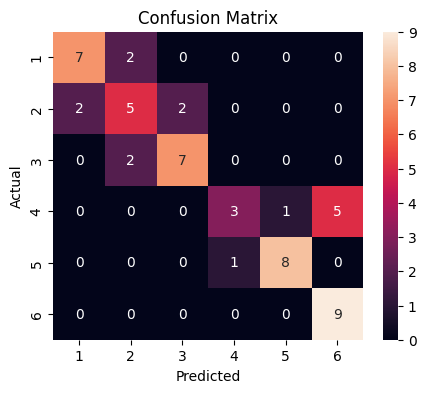

In [27]:
# Calculating the magnitude of the acceleration for each sample and time step
acc_magnitude = X_train[:,:,0]**2 + X_train[:,:,1]**2 + X_train[:,:,2]**2 
acc_magnitude_test = X_test[:,:,0]**2 + X_test[:,:,1]**2 + X_test[:,:,2]**2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import tsfel
X_tsf_train = []

# The features picked are: absolute energy, mean absolute deviation, peak to peak distance, rms, autocorrelation, variance, and mean.
# for training set
for i in range(len(acc_magnitude)):
    l = []
    l.append(tsfel.feature_extraction.features.abs_energy(acc_magnitude[i]))
    l.append(tsfel.feature_extraction.features.mean_abs_deviation(acc_magnitude[i]))
    l.append(tsfel.feature_extraction.features.pk_pk_distance(acc_magnitude[i]))
    l.append(tsfel.feature_extraction.features.rms(acc_magnitude[i]))
    l.append(tsfel.feature_extraction.features.autocorr(acc_magnitude[i]))
    l.append(tsfel.feature_extraction.features.calc_var(acc_magnitude[i]))
    l.append(tsfel.feature_extraction.features.calc_mean(acc_magnitude[i]))
    X_tsf_train.append(np.array(l))
    
X_tsf_train= np.array(X_tsf_train)
print("Shape of training data:",X_tsf_train.shape)

X_tsf_test = []

for i in range(len(acc_magnitude_test)):
    l = []
    l.append(tsfel.feature_extraction.features.abs_energy(acc_magnitude_test[i]))
    l.append(tsfel.feature_extraction.features.mean_abs_deviation(acc_magnitude_test[i]))
    l.append(tsfel.feature_extraction.features.pk_pk_distance(acc_magnitude_test[i]))
    l.append(tsfel.feature_extraction.features.rms(acc_magnitude_test[i]))
    l.append(tsfel.feature_extraction.features.autocorr(acc_magnitude_test[i]))
    l.append(tsfel.feature_extraction.features.calc_var(acc_magnitude_test[i]))
    l.append(tsfel.feature_extraction.features.calc_mean(acc_magnitude_test[i]))
    X_tsf_test.append(np.array(l))
    
X_tsf_test= np.array(X_tsf_test)
print("Shape of testing data:",X_tsf_test.shape)

from sklearn.tree import DecisionTreeClassifier

dt2 = DecisionTreeClassifier(criterion='entropy',random_state=44)
dt2.fit(X_tsf_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
y_pred = dt2.predict(X_tsf_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred, average = 'weighted') 
print(f'Precision: {precision}')

# Calculate recall (for binary classification, set the average parameter accordingly)
recall = recall_score(y_test, y_pred, average = 'weighted')  
print(f'Recall: {recall}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=range(1, 7), yticklabels=range(1, 7))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Conclusion:**
The model demonstrated its capabilities in predicting activities based on accelerometer data with a decent accuracy of **67%** and **72%**.

# 2. Predicting My Activities Using My Collected Data

## **Objective:**
To leverage the Decision Tree model trained on the UCI-HAR dataset to predict activities based on my own collected raw accelerometer data.

## **Preprocessing Decision:**
Since my collected data is raw accelerometer data, I applied preprocessing to align it with the model's input requirements.

## **Steps:**
1. **Preprocess the raw accelerometer data:**
   - Normalize accelerometer readings.
   - Compute the magnitude of the acceleration vector.
2. **Predict activities** using the trained model.
3. **Evaluate model performance** with the same metrics as before.

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Parameters
original_freq = 413 
target_freq = 50   
trim_time = 10    
downsample_factor = int(original_freq / target_freq) 

csv_files = [
    r"CSV/AL.csv", 
    r"CSV/AS.csv",
    r"CSV/AST.csv",
    r"CSV/AW.csv",
    r"CSV/AWD.csv",
    r"CSV/AWU.csv",
    r"CSV/CL.csv",
    r"CSV/CS.csv",
    r"CSV/CST.csv",
    r"CSV/CW.csv",
    r"CSV/CWD.csv",
    r"CSV/CWU.csv",
    r"CSV/HL.csv",
    r"CSV/HS.csv",
    r"CSV/HST.csv",
    r"CSV/HW.csv",
    r"CSV/HWD.csv",
    r"CSV/HWU.csv",
    r"CSV/JL.csv",
    r"CSV/JS.csv",
    r"CSV/JST.csv",
    r"CSV/JW.csv",
    r"CSV/JWD.csv",
    r"CSV/JWU.csv"
]

all_data = []
Y_train = []  

def get_label(file_name):
    if 'L.csv' in file_name:
        return 6  # LAYING
    elif 'S.csv' in file_name:
        return 4  # SITTING
    elif 'ST.csv' in file_name:
        return 5  # STANDING
    elif 'W.csv' in file_name:
        return 1  # WALKING
    elif 'WD.csv' in file_name:
        return 3  # WALKING_DOWNSTAIRS
    elif 'WU.csv' in file_name:
        return 2  # WALKING_UPSTAIRS
    return -1  

def compute_norm(data):
    ax = data[:, 1]
    ay = data[:, 2] 
    az = data[:, 3] 
    norm = np.sqrt(ax**2 + ay**2 + az**2) 
    return norm.reshape(-1, 1)

def process_csv(file_path):
    df = pd.read_csv(file_path)

    samples_to_keep = trim_time * original_freq
    total_samples = len(df)
    
    if total_samples < samples_to_keep:
        if total_samples < 4130:
            df = df.reindex(np.linspace(0, total_samples - 1, 4130).astype(int))
            total_samples = len(df)

    # Trimming the data to the central 10 seconds
    if total_samples >= samples_to_keep:
        trim_start = (total_samples - samples_to_keep) // 2
        trim_end = trim_start + samples_to_keep
        df_trimmed = df.iloc[trim_start:trim_end]
        
        # Downsampling the data
        df_downsampled = df_trimmed.iloc[::downsample_factor]

        if len(df_downsampled) < 500:
            return None
        
        # Compute the norm and keep it as the only column
        norm_column = compute_norm(df_downsampled.values[:500])
        return norm_column 
    
    return None

for file_path in csv_files:
    result = process_csv(file_path)
    if result is not None:
        all_data.append(result)
        label = get_label(file_path)
        Y_train.append(label)

# Checking if we have collected the whole data
if len(all_data) == 24:
    combined_array = np.array(all_data)  # Shape should be (24, 500, 1)
    print("Final shape of combined_array:", combined_array.shape)
    
    combined_df = pd.DataFrame(combined_array.reshape(24 * 500, 1), columns=['Norm'])
    combined_df.to_csv('combined_data.csv', index=False)
    
    # Create y_train DataFrame
    y_train_array = np.array(Y_train)
    y_train_df = pd.DataFrame(y_train_array, columns=['Activity Label'])
    y_train_df.to_csv('y_train.csv', index=False)


Final shape of combined_array: (24, 500, 1)


Accuracy: 0.17
Precision for each class: [0.25       0.5        0.07142857 0.         0.         0.        ]
Recall for each class: [0.5  0.25 0.25 0.   0.   0.  ]
F1 Score for each class: [0.33333333 0.33333333 0.11111111 0.         0.         0.        ]
Overall Accuracy: 0.17
Overall Precision: 0.14
Overall Recall: 0.17
Overall F1 Score: 0.13
Classification Report:
              precision    recall  f1-score   support

           1       0.25      0.50      0.33         4
           2       0.50      0.25      0.33         4
           3       0.07      0.25      0.11         4
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         4

    accuracy                           0.17        24
   macro avg       0.14      0.17      0.13        24
weighted avg       0.14      0.17      0.13        24



C:\Users\dhwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dhwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dhwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

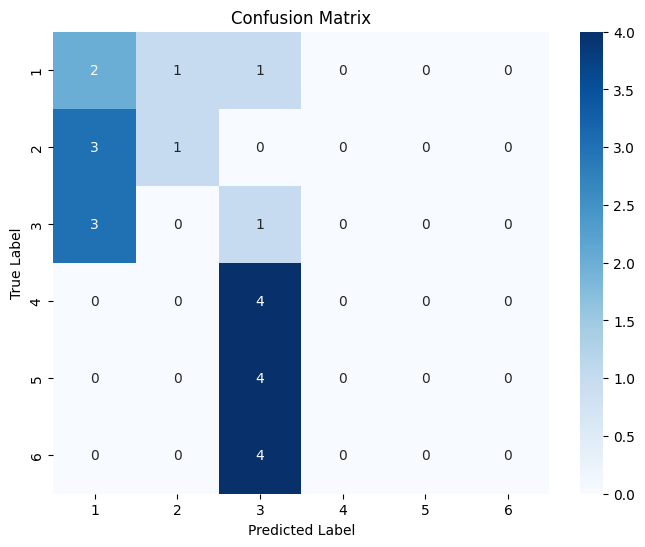

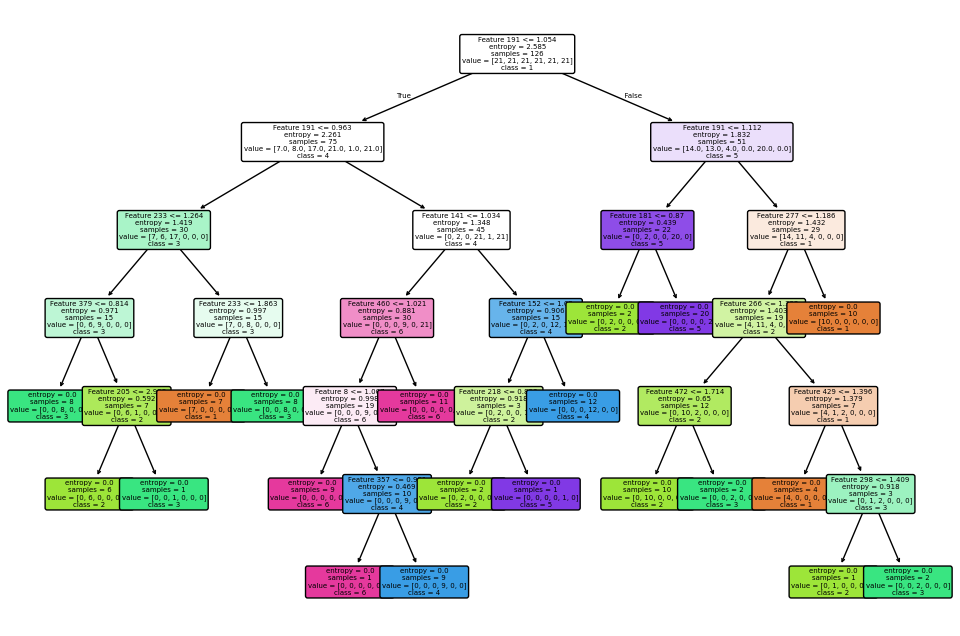

In [29]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load the data
combined_df = pd.read_csv('combined_data.csv')
y_train_df = pd.read_csv('y_train.csv')

# Preparing the features (X) and labels (y)
X_test = combined_df.values
y_test = y_train_df['Activity Label'].values

X_test = X_test.reshape(24, 500)

y_pred = dt.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Precision, Recall, F1 Score for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print("Precision for each class:", precision)
print("Recall for each class:", recall)
print("F1 Score for each class:", f1)

print(f"Overall Accuracy: {accuracy:.2f}")
print(f"Overall Precision: {precision.mean():.2f}")
print(f"Overall Recall: {recall.mean():.2f}")
print(f"Overall F1 Score: {f1.mean():.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting the Decision Tree
plt.figure(figsize=(12, 8))

# Ensure dt is your trained Decision Tree model
plot_tree(dt, 
          filled=True,          
          feature_names=[f'Feature {i+1}' for i in range(X_test.shape[1])], 
          class_names=[str(i) for i in np.unique(y_test)],
          rounded=True,
          fontsize=5)        

# Show the plot
plt.show()


Shape of training data: (24, 7)
Accuracy: 0.33
Precision for each class: [0.66666667 0.         0.4        0.         0.         0.33333333]
Recall for each class: [0.5 0.  0.5 0.  0.  1. ]
F1 Score for each class: [0.57142857 0.         0.44444444 0.         0.         0.5       ]
Overall Accuracy: 0.33
Overall Precision: 0.23
Overall Recall: 0.33
Overall F1 Score: 0.25
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.50      0.57         4
           2       0.00      0.00      0.00         4
           3       0.40      0.50      0.44         4
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4
           6       0.33      1.00      0.50         4

    accuracy                           0.33        24
   macro avg       0.23      0.33      0.25        24
weighted avg       0.23      0.33      0.25        24



C:\Users\dhwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dhwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dhwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

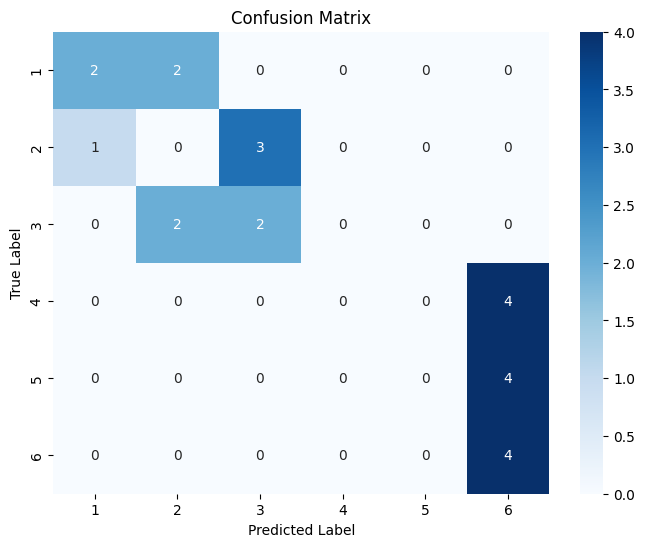

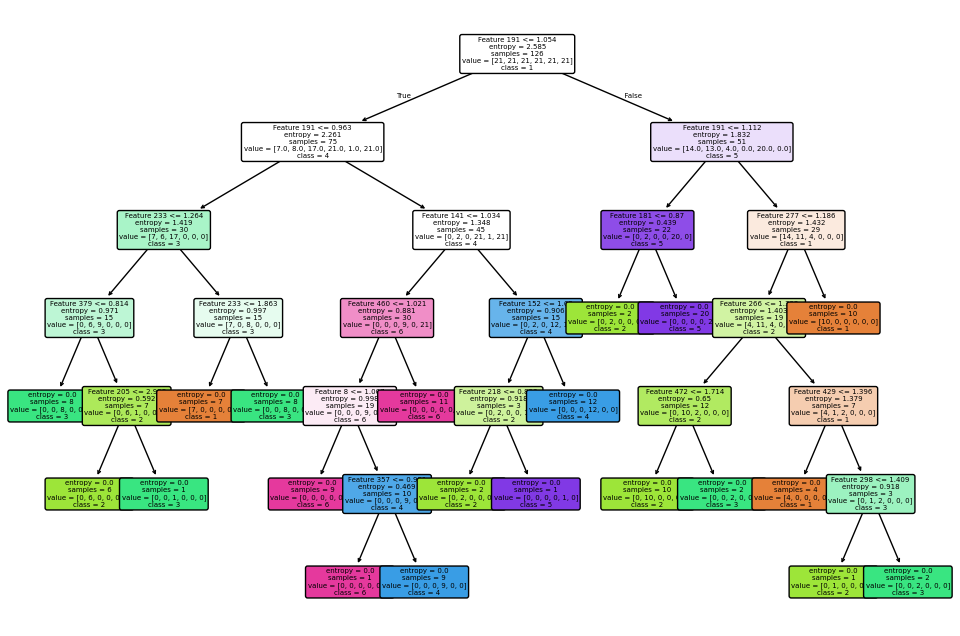

In [30]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import tsfel

# Preparing the features (X) and labels (y)
X_test = combined_df.values
y_test = y_train_df['Activity Label'].values

X_test = X_test.reshape(24, 500)

X_tsf_train2 = []

# The features picked are: absolute energy, mean absolute deviation, peak to peak distance, rms, autocorrelation, variance, and mean.
# for training set
for i in range(len(X_test)):
    l = []
    l.append(tsfel.feature_extraction.features.abs_energy(X_test[i]))
    l.append(tsfel.feature_extraction.features.mean_abs_deviation(X_test[i]))
    l.append(tsfel.feature_extraction.features.pk_pk_distance(X_test[i]))
    l.append(tsfel.feature_extraction.features.rms(X_test[i]))
    l.append(tsfel.feature_extraction.features.autocorr(X_test[i]))
    l.append(tsfel.feature_extraction.features.calc_var(X_test[i]))
    l.append(tsfel.feature_extraction.features.calc_mean(X_test[i]))
    X_tsf_train2.append(np.array(l))
    
X_tsf_train2= np.array(X_tsf_train2)
print("Shape of training data:",X_tsf_train2.shape)

y_pred = dt2.predict(X_tsf_train2)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Precision, Recall, F1 Score for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print("Precision for each class:", precision)
print("Recall for each class:", recall)
print("F1 Score for each class:", f1)

print(f"Overall Accuracy: {accuracy:.2f}")
print(f"Overall Precision: {precision.mean():.2f}")
print(f"Overall Recall: {recall.mean():.2f}")
print(f"Overall F1 Score: {f1.mean():.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting the Decision Tree
plt.figure(figsize=(12, 8))

# Ensure dt is your trained Decision Tree model
plot_tree(dt, 
          filled=True,          
          feature_names=[f'Feature {i+1}' for i in range(X_test.shape[1])], 
          class_names=[str(i) for i in np.unique(y_test)],
          rounded=True,
          fontsize=5)        

# Show the plot
plt.show()

Accuracy: 0.38


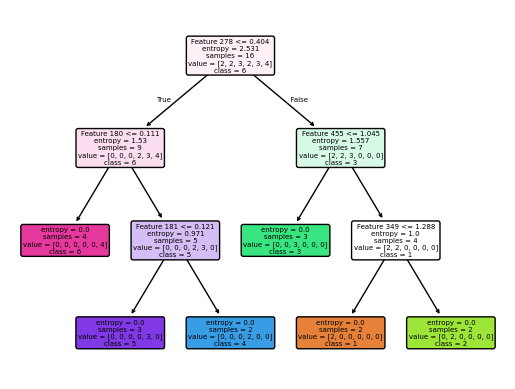

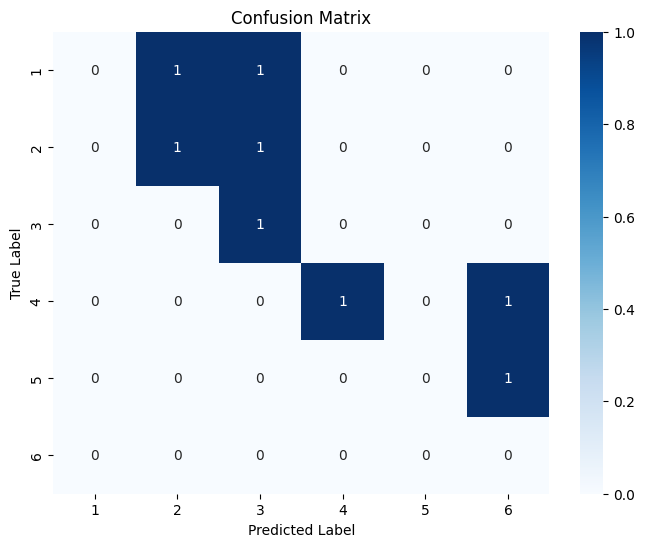

In [31]:
x_train,x_test,y_train,Y_test = train_test_split(X_test,y_test,test_size=0.33,random_state=7)
dt_2 = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt_2.fit(x_train, y_train)
Y_pred = dt_2.predict(x_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')
plot_tree(dt_2, 
          filled=True,          
          feature_names=[f'Feature {i+1}' for i in range(X_test.shape[1])], 
          class_names=[str(i) for i in np.unique(y_test)],
          rounded=True,
          fontsize=5)  
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



Accuracy: 0.50


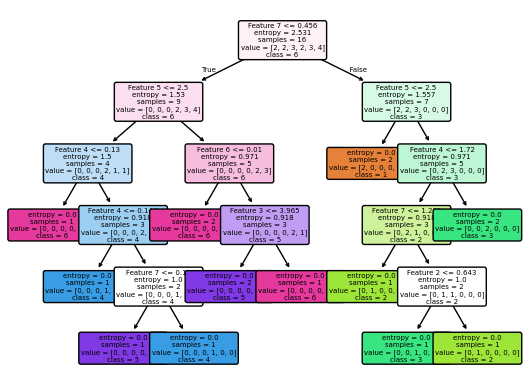

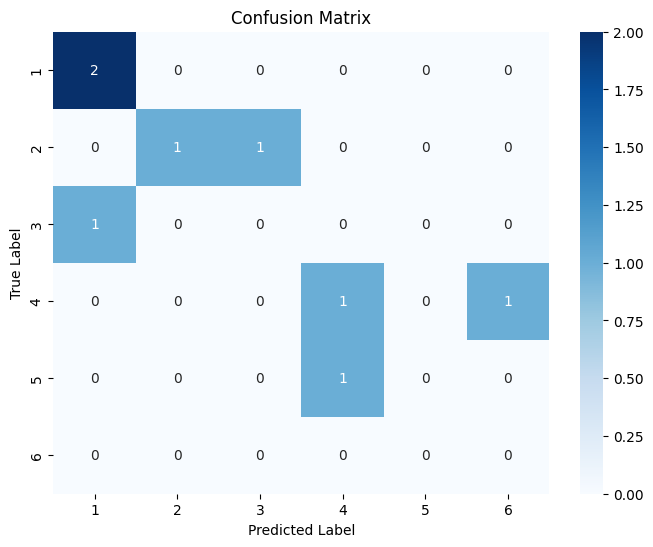

In [32]:
x_train,x_test,y_train,Y_test = train_test_split(X_tsf_train2,y_test,test_size=0.33,random_state=7)
dt_2 = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt_2.fit(x_train, y_train)
Y_pred = dt_2.predict(x_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')
plot_tree(dt_2, 
          filled=True,          
          feature_names=[f'Feature {i+1}' for i in range(X_test.shape[1])], 
          class_names=[str(i) for i in np.unique(y_test)],
          rounded=True,
          fontsize=5)  
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## **Conclusion:**
The model's performance was lower compared to using the UCI-HAR dataset. This was likely due to the negligible difference in acceleration variation between static and dynamic activities in my collected data.

# 3. Few-Shot Prompting Using the UCI-HAR Dataset

## **Objective:**
To apply Few-Shot prompting with the UCI-HAR dataset to predict activities based on a limited number of examples.

## **Approach:**
I used examples from the UCI-HAR dataset as prompts to guide the model in predicting activities from my test data, ensuring both underwent similar preprocessing.

## **Steps:**
1. **Use Few-Shot prompting** to predict activities from the UCI-HAR dataset.
2. **Evaluate performance** with accuracy, precision, recall, and a confusion matrix.

In [33]:
import numpy as np
import pandas as pd
from langchain_groq.chat_models import ChatGroq
from dotenv import load_dotenv
import os

def config():
    load_dotenv()
    
config()

# acc_magnitude = np.vstack((acc_magnitude,acc_magnitude_test))
# y_train = np.concatenate((y_train,y_test0))


groq_models = {
    "llama3-70b": "llama3-70b-8192",
    "mixtral": "mixtral-8x7b-32768",
    "gemma-7b": "gemma-7b-it",
    "llama3.1-70b": "llama-3.1-70b-versatile",
    "llama3-8b": "llama3-8b-8192",
    "llama3.1-8b": "llama-3.1-8b-instant",
    "gemma-9b": "gemma2-9b-it"
}

# Making a dictionary to store one sample for each activity
activity_samples = {1: None, 2: None, 3: None, 4: None, 5: None, 6: None}

# Looping through y_train to find one example for each activity type
for index, activity in enumerate(y_train):
    if activity_samples[activity] is None: 
        activity_samples[activity] = acc_magnitude[index]

sample_data = np.array(list(activity_samples.values()))
activity_labels = ["WALKING", "SITTING", "STANDING", "LAYING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

few_shot_examples = [
    {
        "data": sample_data[i].tolist(),
        "activity": activity_labels[i]  
    }
    for i in range(len(activity_labels))  # Using example for each activity
]

# Looping through a limited number of samples in acc_magnitude for prediction
predictions = []
max_samples = 5 

for i in range(max_samples):
    query = "* You are an advanced activity classification model specifically trained to analyze accelerometer data.\n" \
        "* Your task is to accurately classify the given data into one of the following activities:\n" \
        "    - WALKING\n" \
        "    - SITTING\n" \
        "    - STANDING\n" \
        "    - LAYING\n" \
        "    - WALKING_DOWNSTAIRS\n" \
        "    - WALKING_UPSTAIRS\n" \
        "* Please analyze the provided accelerometer data carefully and respond with the precise activity label only.\n\n" \
        "Here are some examples to guide you in your classification:\n"

    for j, example in enumerate(few_shot_examples[:2]):
        query += f"{j + 1}. Accelerometer Data: '{example['data'][:50]}'\n   Activity: {example['activity']}\n" 

    # Adding a new test sample for prediction
    test_sample = acc_magnitude[i].tolist()
    query += f"\nNow analyze the following accelerometer data and provide the predicted activity:\nAccelerometer Data: {test_sample[:50]}\n" 
    
    model_name = "llama3-8b"  # Choose any model from the groq_models dictionary
    llm = ChatGroq(model=groq_models[model_name], api_key=os.getenv("GROQ_API_KEY"), temperature=0.1) # Increased temperature for variability
    
    # Invoking the model
    answer = llm.invoke(query)
    predictions.append(answer.content)  # Store the prediction for each sample

# Print predictions for all samples
for i, prediction in enumerate(predictions):
    print(f"Sample {i + 1}: {prediction}")

Sample 1: Based on the provided accelerometer data, I predict the activity to be:

WALKING
Sample 2: Based on the provided accelerometer data, I predict the activity to be:

WALKING
Sample 3: Based on the provided accelerometer data, I predict the activity to be:

WALKING
Sample 4: Based on the provided accelerometer data, I predict the activity to be:

WALKING
Sample 5: Based on the provided accelerometer data, I predict the activity to be:

WALKING


In [35]:
# Looping through the actual number of samples in acc_magnitude for prediction
predictions = []
max_samples = min(acc_magnitude.shape[0], len(y_train))  # Ensure we don't exceed the length of y_train

for i in range(max_samples):
    query = "* You are an advanced activity classification model specifically trained to analyze accelerometer data.\n" \
        "* Your task is to accurately classify the given data into one of the following activities:\n" \
        "    - WALKING\n" \
        "    - SITTING\n" \
        "    - STANDING\n" \
        "    - LAYING\n" \
        "    - WALKING_DOWNSTAIRS\n" \
        "    - WALKING_UPSTAIRS\n" \
        "* Please analyze the provided accelerometer data carefully and respond with the precise activity label only.\n\n" \
        "Here are some examples to guide you in your classification:\n"

    test_sample = acc_magnitude[i].tolist()  # Get the i-th sample for prediction
    query += f"\nNow analyze the following accelerometer data and provide the predicted activity:\nAccelerometer Data: {test_sample[:]}\n" 
    
    # Using Groq LLMs for each test sample
    model_name = "llama3-8b" 
    llm = ChatGroq(model=groq_models[model_name], api_key=os.getenv("GROQ_API_KEY"), temperature=0.1)
    
    # Invoking the model
    answer = llm.invoke(query)
    
    label_map = {
    "WALKING": 1,
    "SITTING": 4,
    "STANDING": 5,
    "LAYING": 6,
    "WALKING_DOWNSTAIRS": 3,
    "WALKING_UPSTAIRS": 2
     }

    # Extract the predicted activity label
    for label in label_map.keys():
        if label in answer.content:
            predicted_activity = label_map[label]  # Get numeric value from the label map
            predictions.append(predicted_activity)
            break
        else:
            predictions.append(0) 


# Ensure y_train and predictions are the same length
if len(y_train) != len(predictions):
    # print(f"Length mismatch: y_train has {len(y_train)} samples and predictions has {len(predictions)} samples.")
    # Truncate predictions to match y_train if necessary
    predictions = predictions[:len(y_train)]

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_train, predictions)
precision = precision_score(y_train, predictions, average='weighted', zero_division=0)
recall = recall_score(y_train, predictions, average='weighted', zero_division=0)
f1 = f1_score(y_train, predictions, average='weighted', zero_division=0)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.1250
Precision: 0.0156
Recall: 0.1250
F1 Score: 0.0278


In [55]:
import numpy as np
import pandas as pd
from langchain_groq.chat_models import ChatGroq

groq_models = {
    "llama3-70b": "llama3-70b-8192",
    "mixtral": "mixtral-8x7b-32768",
    "gemma-7b": "gemma-7b-it",
    "llama3.1-70b": "llama-3.1-70b-versatile",
    "llama3-8b": "llama3-8b-8192",
    "llama3.1-8b": "llama-3.1-8b-instant",
    "gemma-9b": "gemma2-9b-it"
}

# Making a dictionary to store one sample for each activity
activity_samples = {1: None, 2: None, 3: None, 4: None, 5: None, 6: None}

# Looping through new_y_train to find one example for each activity type
for index, activity in enumerate(y_train):
    activity = activity.item()  
    if activity_samples[activity] is None:
        activity_samples[activity] = X_tsf_train[index]
        
sample_data = np.array(list(activity_samples.values()))
activity_labels = ["WALKING", "SITTING", "STANDING", "LAYING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

few_shot_examples = [
    {
        "data": sample_data[i].tolist(),
        "activity": activity_labels[i]  
    }
    for i in range(len(activity_labels))  # Using example for each activity
]

# Looping through a limited number of samples in new_x_train for prediction
predictions = []
max_samples = 100

for i in range(max_samples):
    query = "* You are an advanced activity classification model specifically trained to analyze accelerometer data.\n" \
        "* Your task is to accurately classify the given data into one of the following activities:\n" \
        "    - WALKING\n" \
        "    - SITTING\n" \
        "    - STANDING\n" \
        "    - LAYING\n" \
        "    - WALKING_DOWNSTAIRS\n" \
        "    - WALKING_UPSTAIRS\n" \
        "* Please analyze the provided accelerometer data carefully and respond with the precise activity label only.\n\n" \
        "Here are some examples to guide you in your classification:\n"
        
    for j, example in enumerate(few_shot_examples):
        query += f"{j + 1}. TSFEL Features: {example['data'][:7]}\n   Activity: {example['activity']}\n"

    # Adding a new test sample for prediction
    test_sample = X_tsf_train[i].tolist()
    query += f"\nNow analyze the following TSFEL features and provide the predicted activity:\nTSFEL Features: {test_sample}\n" 
    
    model_name = "llama3-8b"  # Choose any model from the groq_models dictionary
    llm = ChatGroq(model=groq_models[model_name], api_key=os.getenv("GROQ_API_KEY"), temperature=0.1) # Increased temperature for variability
    
    # Invoking the model
    answer = llm.invoke(query)
    predictions.append(answer.content)  # Store the prediction for each sample

# Printing predictions for all samples
for i, prediction in enumerate(predictions):
    print(f"Sample {i + 1}: {prediction}")

Sample 1: Based on the provided TSFEL features, I predict the activity to be:

WALKING_UPSTAIRS
Sample 2: Based on the provided TSFEL features, I predict the activity to be:

STANDING
Sample 3: Based on the provided TSFEL features, I predict the activity to be:

STANDING
Sample 4: Based on the provided TSFEL features, I predict the activity to be:

WALKING
Sample 5: Based on the provided TSFEL features, I predict the activity as:

WALKING_DOWNSTAIRS
Sample 6: Based on the provided TSFEL features, I predict the activity to be:

SITTING
Sample 7: Based on the provided TSFEL features, I predict the activity to be:

WALKING
Sample 8: Based on the provided TSFEL features, I predict the activity to be:

WALKING
Sample 9: Based on the provided TSFEL features, I predict the activity to be:

STANDING
Sample 10: Based on the provided TSFEL features, I predict the activity to be:

WALKING
Sample 11: Based on the provided TSFEL features, I predict the activity to be:

WALKING
Sample 12: Based on t

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initializing an empty list for predictions
predictions = []
max_smaples = 100

# Looping through the actual number of samples in new_x_train for prediction
for i in range(max_samples):
    query = "* You are an advanced activity classification model specifically trained to analyze accelerometer data.\n" \
        "* Your task is to accurately classify the given data into one of the following activities:\n" \
        "    - WALKING\n" \
        "    - SITTING\n" \
        "    - STANDING\n" \
        "    - LAYING\n" \
        "    - WALKING_DOWNSTAIRS\n" \
        "    - WALKING_UPSTAIRS\n" \
        "* Please analyze the provided accelerometer data carefully and respond with the precise activity label only.\n\n" \
        "Here are some examples to guide you in your classification:\n"

    # Getting the i-th sample for prediction and add it to the query
    test_sample = X_tsf_train[i].tolist()
    query += f"\nNow analyze the following TSFEL feature data and provide the predicted activity:\nTSFEL Features: {test_sample}\n"
    
    model_name = "llama3-8b"
    llm = ChatGroq(model=groq_models[model_name], api_key=os.getenv("GROQ_API_KEY"), temperature=0.1)
    
    answer = llm.invoke(query)
    
    # Mapping the predicted label to a numeric value
    label_map = {
        "WALKING": 1,
        "SITTING": 4,
        "STANDING": 5,
        "LAYING": 6,
        "WALKING_DOWNSTAIRS": 3,
        "WALKING_UPSTAIRS": 2
    }

    # Initializing the predicted activity
    predicted_activity = 0 
    for label, numeric_value in label_map.items():
        if label in answer.content:
            predicted_activity = numeric_value
            break

    predictions.append(predicted_activity)

# Ensuring the predictions list matches the length of new_y_train
predictions = predictions[:len(y_train)]

# Calculating accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_train, predictions)
precision = precision_score(y_train, predictions, average='weighted', zero_division=0)
recall = recall_score(y_train, predictions, average='weighted', zero_division=0)
f1 = f1_score(y_train, predictions, average='weighted', zero_division=0)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.1250
Precision: 0.0156
Recall: 0.1250
F1 Score: 0.0278


## **Conclusion:**
Few-Shot prompting yielded decent predictions, although the performance was lower compared to using a fully trained model. The lower accuracy was likely due to the negligible difference in acceleration variation between static and dynamic activities in the data.

# 4. Few-Shot Prompting Using My Collected Data

## **Objective:**
To use Few-Shot prompting with my own collected raw accelerometer data to predict activities.

## **Preprocessing Decision:**
I preprocessed my collected data to ensure compatibility with the Few-Shot prompting examples.

## **Steps:**
1. **Apply Few-Shot prompting** to predict activities based on the test data.
2. **Evaluate performance** using accuracy, precision, recall, and a confusion matrix.

In [40]:
new_x_train = combined_df.to_numpy() # Collected accelerometer data
new_x_train = new_x_train.reshape(24,500)
new_y_train = y_train_df.to_numpy()
new_x_train.shape, new_y_train.shape

((24, 500), (24, 1))

In [41]:
import numpy as np
import pandas as pd
from langchain_groq.chat_models import ChatGroq
from dotenv import load_dotenv
import os

def config():
    load_dotenv()
    
config()

groq_models = {
    "llama3-70b": "llama3-70b-8192",
    "mixtral": "mixtral-8x7b-32768",
    "gemma-7b": "gemma-7b-it",
    "llama3.1-70b": "llama-3.1-70b-versatile",
    "llama3-8b": "llama3-8b-8192",
    "llama3.1-8b": "llama-3.1-8b-instant",
    "gemma-9b": "gemma2-9b-it"
}

# Making a dictionary to store one sample for each activity
activity_samples = {1: None, 2: None, 3: None, 4: None, 5: None, 6: None}

# Looping through y_train to find one example for each activity type
for index, activity in enumerate(new_y_train):
    activity = activity.item()  
    if activity_samples[activity] is None:
        activity_samples[activity] = new_x_train[index]
        
sample_data = np.array(list(activity_samples.values()))
activity_labels = ["WALKING", "SITTING", "STANDING", "LAYING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

few_shot_examples = [
    {
        "data": sample_data[i].tolist(),
        "activity": activity_labels[i]  
    }
    for i in range(len(activity_labels))  # Using example for each activity
]

# Looping through a limited number of samples in acc_magnitude for prediction
predictions = []
max_samples = 5 

for i in range(max_samples):
    query = "* You are an expert activity classification model.\n" \
        "* Your task is to analyze the given accelerometer data and classify it as one of the following activities: " \
        "'WALKING', 'SITTING', 'STANDING', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'.\n" \
        "* WALKING data often shows periodic spikes, corresponding to steps taken.\n" \
        "* SITTING data is usually stable with minimal variation.\n" \
        "* STANDING data is similar to sitting but may have slight movement artifacts.\n" \
        "* LAYING data is very stable with almost flat readings.\n" \
        "* WALKING_UPSTAIRS shows periodic spikes with increasing intensity.\n" \
        "* WALKING_DOWNSTAIRS shows periodic spikes with decreasing intensity.\n" \
        "* Provide the activity label for the data provided, based on these patterns.\n\n"
        
    for j, example in enumerate(few_shot_examples[:]):
        query += f"{j + 1}. Accelerometer Data: '{example['data'][:2]}'\n   Activity: {example['activity']}\n"

    # Adding a new test sample for prediction
    test_sample = new_x_train[i].tolist()
    query += f"\nNow analyze the following accelerometer data and provide the predicted activity:\nAccelerometer Data: {test_sample[:250]}\n" 
    
    model_name = "llama3-8b"  # Choose any model from the groq_models dictionary
    llm = ChatGroq(model=groq_models[model_name], api_key=os.getenv("GROQ_API_KEY"), temperature=0.1)  # Increased temperature for variability
    
    # Invoking the model
    answer = llm.invoke(query)
    predictions.append(answer.content)  # Store the prediction for each sample

# Print predictions for all samples
for i, prediction in enumerate(predictions):
    print(f"Sample {i + 1}: {prediction}")


Sample 1: After analyzing the accelerometer data, I predict the activity to be:

**WALKING**

The data shows periodic spikes, which is a characteristic pattern of walking. The intensity of the spikes varies, but the overall pattern is consistent with walking. The data does not show the characteristic patterns of sitting, standing, laying, or going up/down stairs, which are the other possible activities.
Sample 2: After analyzing the accelerometer data, I predict the activity to be:

**WALKING**

The data shows periodic spikes, which is a characteristic pattern of walking. The intensity of the spikes varies, but the overall pattern suggests a walking activity. The data does not exhibit the stability and minimal variation typical of sitting or laying, nor does it show the slight movement artifacts of standing. Additionally, the pattern does not resemble the characteristic patterns of walking upstairs or downstairs. Therefore, based on the periodic spikes and varying intensity, I classify

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize an empty list for predictions
predictions = []

# Limit the number of samples for prediction to match the shorter of new_x_train or new_y_train
max_samples = min(new_x_train.shape[0], len(new_y_train))

# Loop through the actual number of samples in acc_magnitude for prediction
for i in range(max_samples):
    # Construct a more informative query prompt
    query = "* You are an expert activity classification model.\n" \
        "* Your task is to analyze the given accelerometer data and classify it as one of the following activities: " \
        "'WALKING', 'SITTING', 'STANDING', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'.\n" \
        "* WALKING data often shows periodic spikes, corresponding to steps taken.\n" \
        "* SITTING data is usually stable with minimal variation.\n" \
        "* STANDING data is similar to sitting but may have slight movement artifacts.\n" \
        "* LAYING data is very stable with almost flat readings.\n" \
        "* WALKING_UPSTAIRS shows periodic spikes with increasing intensity.\n" \
        "* WALKING_DOWNSTAIRS shows periodic spikes with decreasing intensity.\n" \
        "* Provide the activity label for the data provided, based on these patterns.\n\n"

    # Get the i-th sample for prediction and add it to the query
    test_sample = new_x_train[i].tolist()
    query += f"\nNow analyze the following accelerometer data and provide the predicted activity:\nAccelerometer Data: {test_sample}\n"
    
    # Invoke the Groq model with a lower temperature for more deterministic output
    model_name = "llama3-8b"
    llm = ChatGroq(model=groq_models[model_name], api_key=os.getenv("GROQ_API_KEY"), temperature=0.1)
    
    # Get the prediction from the model
    answer = llm.invoke(query)
    
    # Map the predicted label to a numeric value
    label_map = {
        "WALKING": 1,
        "SITTING": 4,
        "STANDING": 5,
        "LAYING": 6,
        "WALKING_DOWNSTAIRS": 3,
        "WALKING_UPSTAIRS": 2
    }

    # Initialize the predicted activity as 0 (unknown)
    predicted_activity = 0 
    for label, numeric_value in label_map.items():
        if label in answer.content:
            predicted_activity = numeric_value
            break

    # Append the predicted activity to the predictions list
    predictions.append(predicted_activity)

# Ensure the predictions list matches the length of new_y_train
predictions = predictions[:len(new_y_train)]

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(new_y_train, predictions)
precision = precision_score(new_y_train, predictions, average='weighted', zero_division=0)
recall = recall_score(new_y_train, predictions, average='weighted', zero_division=0)
f1 = f1_score(new_y_train, predictions, average='weighted', zero_division=0)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.1667
Precision: 0.0278
Recall: 0.1667
F1 Score: 0.0476


In [43]:
import numpy as np
import pandas as pd
from langchain_groq.chat_models import ChatGroq

groq_models = {
    "llama3-70b": "llama3-70b-8192",
    "mixtral": "mixtral-8x7b-32768",
    "gemma-7b": "gemma-7b-it",
    "llama3.1-70b": "llama-3.1-70b-versatile",
    "llama3-8b": "llama3-8b-8192",
    "llama3.1-8b": "llama-3.1-8b-instant",
    "gemma-9b": "gemma2-9b-it"
}

# Making a dictionary to store one sample for each activity
activity_samples = {1: None, 2: None, 3: None, 4: None, 5: None, 6: None}

# Looping through new_y_train to find one example for each activity type
for index, activity in enumerate(y_test):
    activity = activity.item()  
    if activity_samples[activity] is None:
        activity_samples[activity] = X_tsf_train2[index]
        
sample_data = np.array(list(activity_samples.values()))
activity_labels = ["WALKING", "SITTING", "STANDING", "LAYING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

few_shot_examples = [
    {
        "data": sample_data[i].tolist(),
        "activity": activity_labels[i]  
    }
    for i in range(len(activity_labels))  # Using example for each activity
]

# Looping through a limited number of samples in new_x_train for prediction
predictions = []
max_samples = 24

for i in range(max_samples):
    query = "* You are an expert activity classification model.\n" \
        "* Your task is to analyze the given accelerometer data and classify it as one of the following activities: " \
        "'WALKING', 'SITTING', 'STANDING', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'.\n" \
        "* WALKING data often shows periodic spikes, corresponding to steps taken.\n" \
        "* SITTING data is usually stable with minimal variation.\n" \
        "* STANDING data is similar to sitting but may have slight movement artifacts.\n" \
        "* LAYING data is very stable with almost flat readings.\n" \
        "* WALKING_UPSTAIRS shows periodic spikes with increasing intensity.\n" \
        "* WALKING_DOWNSTAIRS shows periodic spikes with decreasing intensity.\n" \
        "* Provide just the activity label for the data provided, based on these patterns.\n\n"
        
    for j, example in enumerate(few_shot_examples):
        query += f"{j + 1}. TSFEL Features: {example['data'][:7]}\n   Activity: {example['activity']}\n"

    # Adding a new test sample for prediction
    test_sample = X_tsf_train2[i].tolist()
    query += f"\nNow analyze the following TSFEL features and provide the predicted activity:\nTSFEL Features: {test_sample}\n" 
    
    model_name = "llama3-8b"  # Choose any model from the groq_models dictionary
    llm = ChatGroq(model=groq_models[model_name], api_key=os.getenv("GROQ_API_KEY"), temperature=0.1)  # Increased temperature for variability
    
    # Invoking the model
    answer = llm.invoke(query)
    predictions.append(answer.content)  # Store the prediction for each sample

# Print predictions for all samples
for i, prediction in enumerate(predictions):
    print(f"Sample {i + 1}: {prediction}")

Sample 1: Based on the patterns I've learned from the provided data, I would classify the given TSFEL features as:

**WALKING_UPSTAIRS**

The features show a moderate intensity with a slight increase in the first feature (13.194540159999995), which is consistent with the pattern of WALKING_UPSTAIRS. The other features also match the expected values for this activity.
Sample 2: Based on the patterns I've learned from the training data, I would classify the given TSFEL features as:

**LAYING**

The features show very low values for acceleration and jerk, indicating a stable and flat reading, which is consistent with the LAYING activity.
Sample 3: Based on the patterns I've learned from the provided data, I would classify the given TSFEL features as:

**WALKING_DOWNSTAIRS**

The features show periodic spikes with decreasing intensity, which is consistent with the pattern of WALKING_DOWNSTAIRS.
Sample 4: Based on the patterns I've learned from the provided data, I would classify the given 

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initializing an empty list for predictions
predictions = []
max_smaples = 24

# Looping through the actual number of samples in new_x_train for prediction
for i in range(max_samples):
    query = "* You are an expert activity classification model.\n" \
        "* Your task is to analyze the given TSFEL feature data and classify it as one of the following activities: " \
        "'WALKING', 'SITTING', 'STANDING', 'LAYING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'.\n" \
        "* WALKING data often shows periodic spikes, corresponding to steps taken.\n" \
        "* SITTING data is usually stable with minimal variation.\n" \
        "* STANDING data is similar to sitting but may have slight movement artifacts.\n" \
        "* LAYING data is very stable with almost flat readings.\n" \
        "* WALKING_UPSTAIRS shows periodic spikes with increasing intensity.\n" \
        "* WALKING_DOWNSTAIRS shows periodic spikes with decreasing intensity.\n" \
        "* Provide the activity label for the data provided, based on these patterns.\n\n"

    # Getting the i-th sample for prediction and add it to the query
    test_sample = X_tsf_train2[i].tolist()
    query += f"\nNow analyze the following TSFEL feature data and provide the predicted activity:\nTSFEL Features: {test_sample}\n"
    
    model_name = "llama3-8b"
    llm = ChatGroq(model=groq_models[model_name], api_key=os.getenv("GROQ_API_KEY"), temperature=0.1)
    
    answer = llm.invoke(query)
    
    # Mapping the predicted label to a numeric value
    label_map = {
        "WALKING": 1,
        "SITTING": 4,
        "STANDING": 5,
        "LAYING": 6,
        "WALKING_DOWNSTAIRS": 3,
        "WALKING_UPSTAIRS": 2
    }

    # Initializing the predicted activity
    predicted_activity = 0 
    for label, numeric_value in label_map.items():
        if label in answer.content:
            predicted_activity = numeric_value
            break

    predictions.append(predicted_activity)

# Ensuring the predictions list matches the length of new_y_train
predictions = predictions[:len(y_test)]

# Calculating accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, predictions, average='weighted', zero_division=0)
f1 = f1_score(y_test, predictions, average='weighted', zero_division=0)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.21
Precision: 0.14
Recall: 0.21
F1 Score: 0.14


## **Conclusion:**
Few-Shot prompting with my collected data resulted in reasonable performance, although it was not as accurate as using a fully trained model. The lower accuracy was likely due to the negligible difference in acceleration variation between static and dynamic activities in the data.